In [1]:
# --------------------------------------------
# Feedforward Neural Network (FNN) - MNIST CSV
# --------------------------------------------

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\marta\Downloads\MNIST-20221031T095906Z-001\MNIST\mnist_784_csv.csv")

In [3]:
data


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# Split into features and labels
X = data.iloc[:, :-1].values / 255.0   # Normalize pixel values (0–1)
y = data.iloc[:, -1].values            # Last column = label


In [5]:
# Split into train/test (80–20)
split = int(0.8 * len(X))
x_train, x_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
# Display dataset info
print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)

Training data: (56000, 784) (56000, 10)
Testing data: (14000, 784) (14000, 10)


In [8]:
# 2️⃣ Build Feedforward Neural Network (FNN)
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\marta\Anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 3️⃣ Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 4️⃣ Train the model
print("\nTraining model...")
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)



Training model...
Epoch 1/5
394/394 - 5s - 12ms/step - accuracy: 0.9264 - loss: 0.2482 - val_accuracy: 0.9600 - val_loss: 0.1358
Epoch 2/5
394/394 - 3s - 7ms/step - accuracy: 0.9736 - loss: 0.0892 - val_accuracy: 0.9712 - val_loss: 0.0929
Epoch 3/5
394/394 - 3s - 7ms/step - accuracy: 0.9827 - loss: 0.0550 - val_accuracy: 0.9725 - val_loss: 0.0842
Epoch 4/5
394/394 - 3s - 7ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9718 - val_loss: 0.0882
Epoch 5/5
394/394 - 3s - 7ms/step - accuracy: 0.9899 - loss: 0.0300 - val_accuracy: 0.9795 - val_loss: 0.0742


In [11]:
# 5️⃣ Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0657

Test Accuracy: 97.97%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


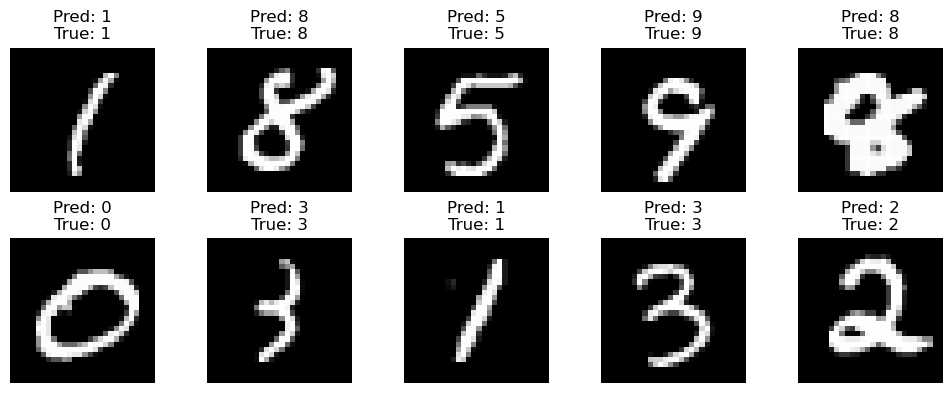

In [12]:
# 6️⃣ Predict first 10 test samples
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)

# 7️⃣ Display images with predicted vs true labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()